In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [5]:
df=pd.read_csv('/content/drive/MyDrive/data_for_lr.csv')
df.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# **Handeling NULL Values**

In [8]:
df = df.dropna()
print("Shape of the dataset = {}".format(df.shape))

Shape of the dataset = (699, 2)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [12]:
# training dataset and labels
train_input = np.array(df.x[0:500]).reshape(500,1)
train_output  = np.array(df.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(df.x[500:700]).reshape(199,1)
test_output  = np.array(df.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# **LINEAR REGRESSION**

**Forward Propogation**               
f(x) = m*x + c; where m and c are the parameters that or model will learn through training.

In [13]:
def forward_propagation(train_input, parameters):  #We already have x and y.
    m = parameters['m']                            #Here parameters is a dictionary
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

# **Defining Cost Function**

Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5

where y are the actual or true values and f(x) are the predicted values.

In [14]:
def cost_function(predictions, train_output):  #Predictions are the things that we got from Forward Regression
    cost = np.mean((train_output - predictions) ** 2) * 0.5  # Mean function is used to get the 1/n thing done
    return cost

# **Gradient Descent for Backpropagation**

Using Chain Rule:


1.   cost
2.   f = f(x)


Partial Derivative of cost function w.r.t m dcost/dm = dcost/df * df/dm

Partial Derivative of cost function w.r.t c dcost/dc = dcost/df * df/dc

Partial Derivatives:

dc/df = (y - f) * -1

df/dw = x

df/db = 1

In [15]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

# **Update the Parameters**

m = m - (learning_rate * dm)

c = c - (learning_rate * dc)

In [16]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

# **Train the Data**

**Sequence of Steps:**

Forward Propagtaion

Cost Function

Backward Propagation

Update Parameters

In [17]:
def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()

    #loss
    loss = list()

    #iterate
    for i in range(iters):

        #forward propagation
        predictions = forward_propagation(train_input, parameters)

        #cost function
        cost = cost_function(predictions, train_output)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #plot function
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')

        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

# **Training**

Iteration = 1, Loss = 2650.2851463906836


<Figure size 640x480 with 0 Axes>

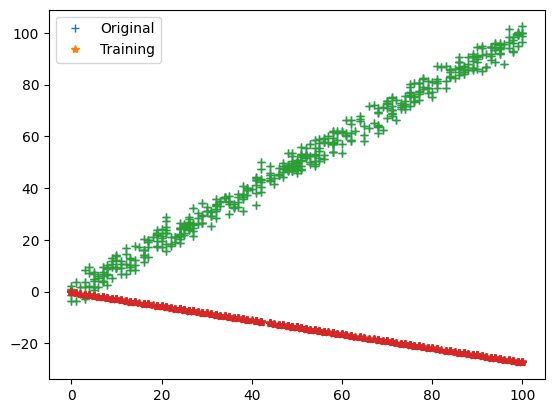

Iteration = 2, Loss = 1204.5741763387061


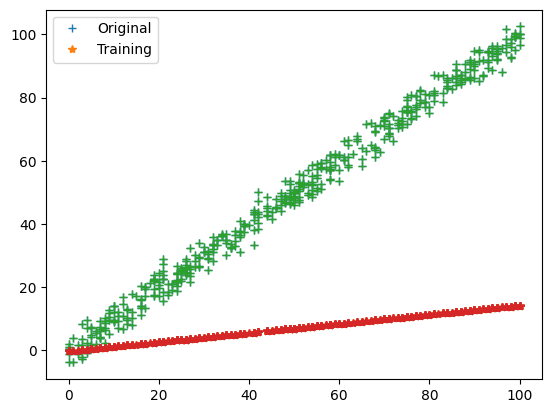

Iteration = 3, Loss = 548.6535078646115


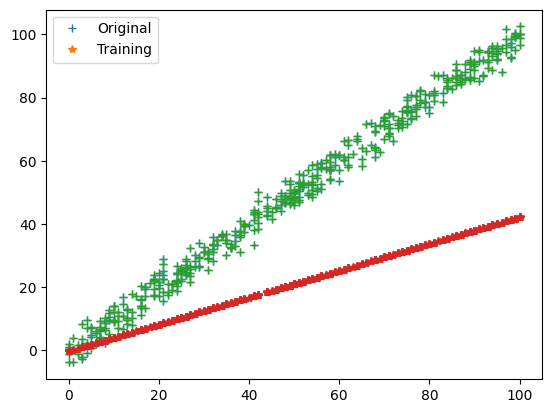

Iteration = 4, Loss = 251.0615740206927


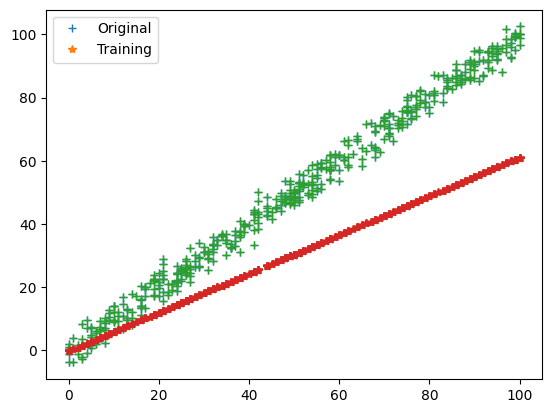

Iteration = 5, Loss = 116.0437839781609


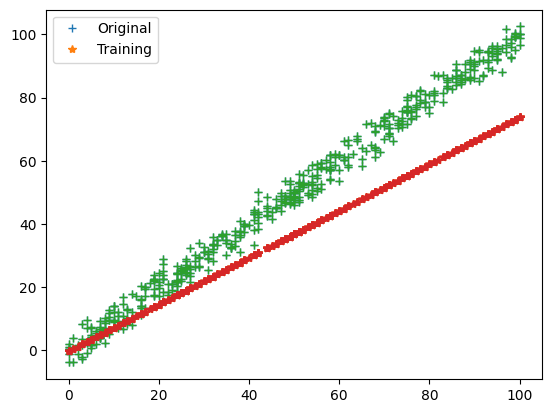

Iteration = 6, Loss = 54.78606305214203


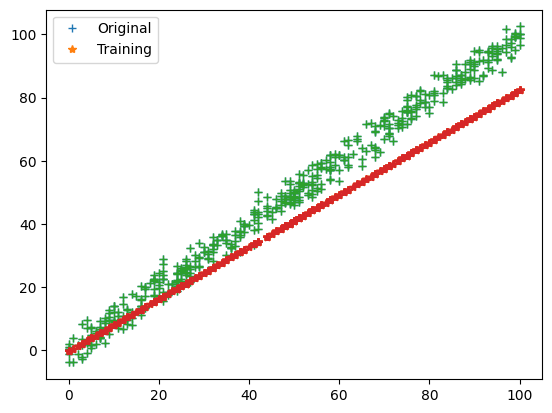

Iteration = 7, Loss = 26.993367183979284


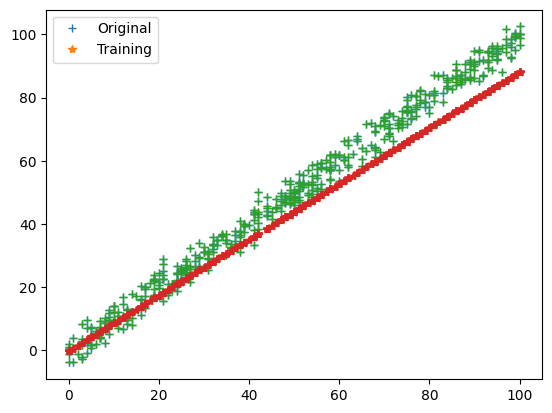

Iteration = 8, Loss = 14.38379025180846


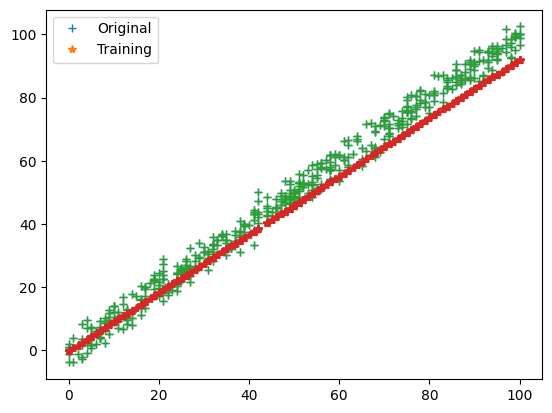

Iteration = 9, Loss = 8.662811198347116


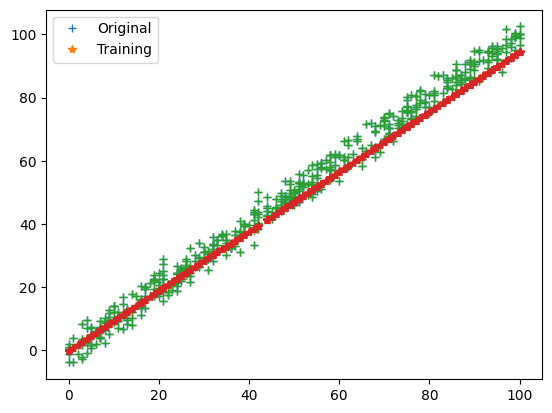

Iteration = 10, Loss = 6.0671966325527915


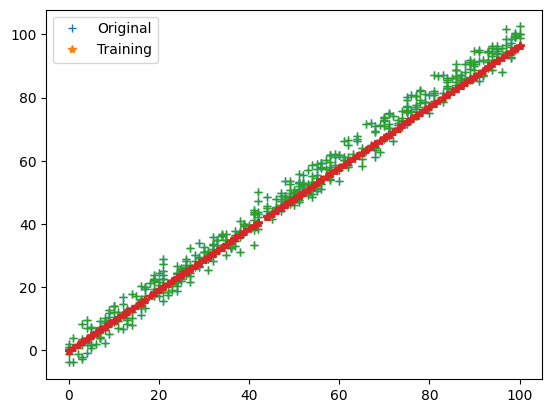

Iteration = 11, Loss = 4.889563396597156


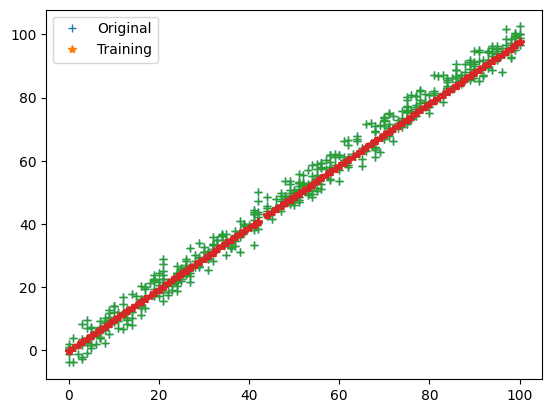

Iteration = 12, Loss = 4.355269860605524


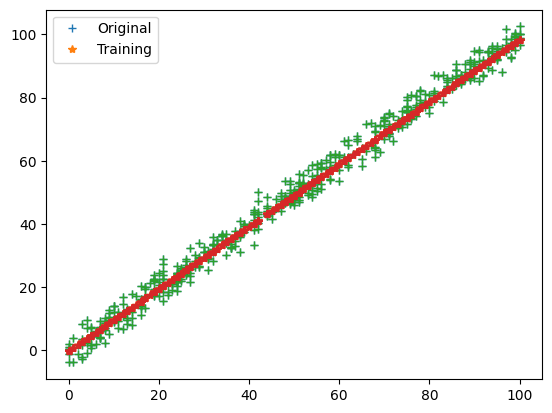

Iteration = 13, Loss = 4.112860259078766


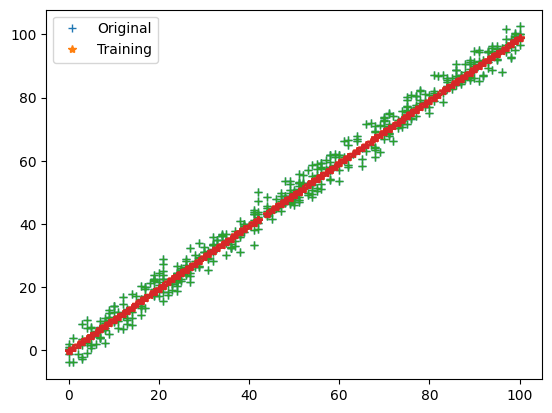

Iteration = 14, Loss = 4.002878721923025


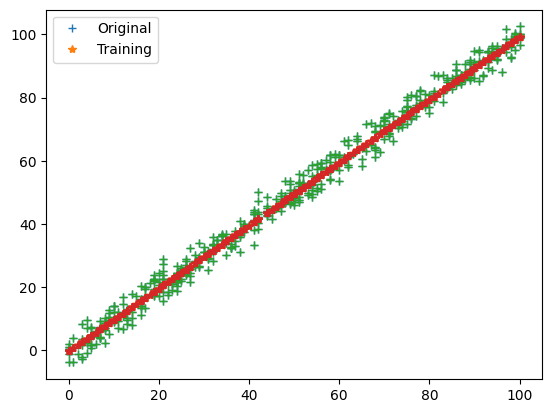

Iteration = 15, Loss = 3.952979944256833


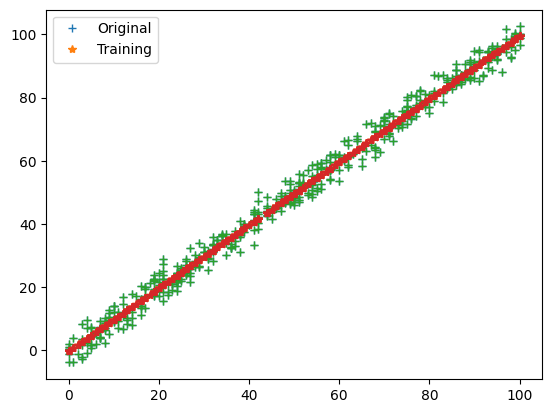

Iteration = 16, Loss = 3.9303407811228244


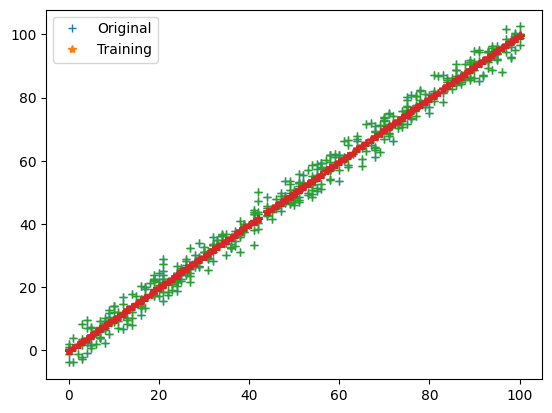

Iteration = 17, Loss = 3.9200693352975735


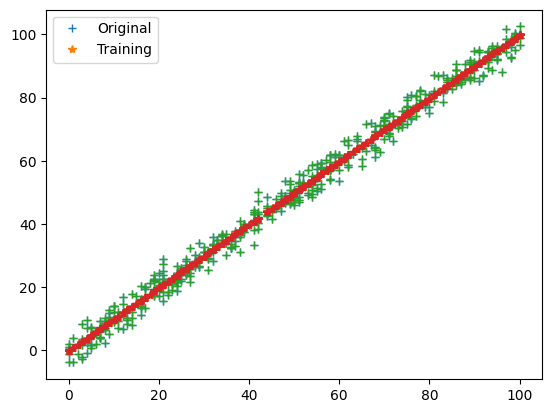

Iteration = 18, Loss = 3.915409136515936


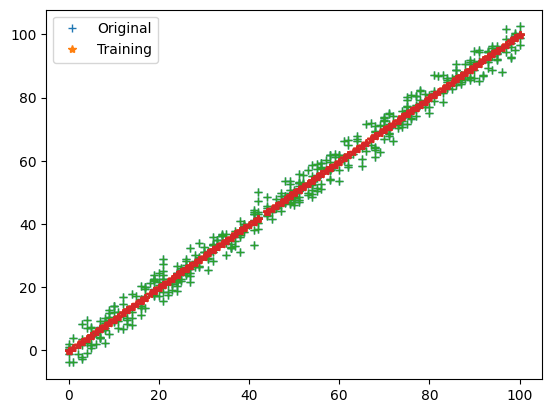

Iteration = 19, Loss = 3.913294766734864


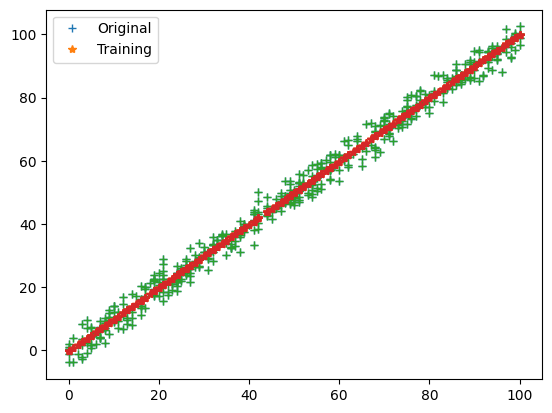

Iteration = 20, Loss = 3.9123354423928487


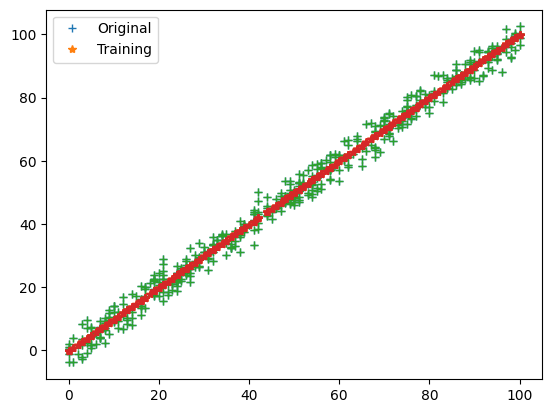

In [18]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [19]:
print(parameters)

{'m': 1.0019932506110074, 'c': -0.33276368100574893}


# **Let's Predict**

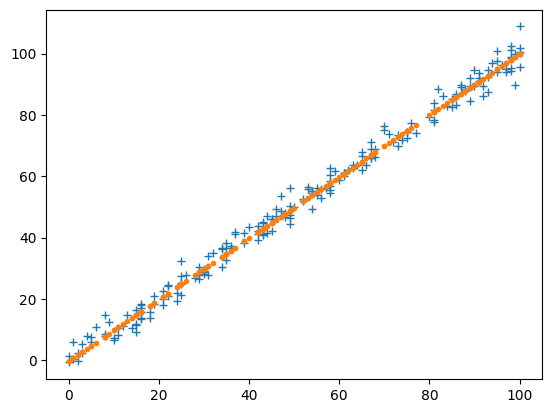

In [22]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

# **Cost for test data**

In [23]:
cost_function(test_predictions, test_output)

4.035918003519274